# **Air Pollution Analysis Translated**

David Bazaldúa Méndez

#**1.Upload the data**

# Introduction

For this project, we started with a dataset in **JSON format** containing air pollution data. To facilitate data handling and analysis, we converted it into a **DataFrame**, organizing the data by **location**, where each column represents a specific monitoring station and the corresponding pollutant levels.

This structuring allowed for **easier comparisons and visualization** across different locations. Additionally, we carefully considered **the temporal coverage of the dataset**, ensuring that only valid data points were included. Since no data was recorded beyond a certain point, we established **November 30th as the cutoff date**, as records beyond this date contained only **NaN (missing) values**.

This preprocessing step was crucial for ensuring **accurate correlations, visualizations, and predictive modeling** in subsequent stages of the analysis.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import json
import pandas as pd
import seaborn as sns

# Upload JSON
with open('contaminantes_2022.json', 'r', encoding='utf-8') as f:
    datos_2022 = json.load(f)

# Shows Json structure
print(json.dumps(datos_2022, indent=4, ensure_ascii=False))


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
# Time series data
Nhoras = 365 * 24
t = np.arange(0, Nhoras)

# Select locations and pollutants
locs = ['ACO', 'ATI', 'CAM', 'MON', 'CHO', 'CUA']
conts = ['O3', 'SO2', 'NOX', 'NO2', 'NO', 'CO']

# Create a dictionary to store the data
data_dict = {'date': pd.date_range(start='2022-01-01', periods=Nhoras, freq='H')}

# Initialize the dictionary with NaN values
for loc in locs:
    for cont in conts:
        data_dict[f'{loc}_{cont}'] = [np.nan] * Nhoras

# Function to adjust the date
def adjust_hour(date_str):
    if '24:00' in date_str:
        date_str = date_str.replace(' 24:00', ' 00:00')
        date = pd.Timestamp(date_str) + pd.Timedelta(days=1)
    else:
        date = pd.Timestamp(date_str)
    return date

# File the dictionary with the data
for date, measurements in datos_2022['pollutionMeasurements']['date'].items():
    adjusted_date = adjust_hour(date)
    date_index = int((adjusted_date - pd.Timestamp('2022-01-01 00:00:00')).total_seconds() // 3600)
    for cont in conts:
        for loc in locs:
            if cont in measurements and loc in measurements[cont]:
                aux = measurements[cont][loc]
                if aux:
                    data_dict[f'{loc}_{cont}'][date_index] = float(aux)

# Create a DataFrame
df = pd.DataFrame(data_dict)

# Filter until November 2022
end_date = '2022-11-30 23:59:59'
df_final = df[df['date'] <= end_date]
df_final=df_final[df_final['date'] > '2022-01-01 00:00:00']
df_final.reset_index(drop=True, inplace=True)
df_final.set_index('date', inplace=True)

df_final.head()



ACO_O3  ACO_SO2  ACO_NOX  ACO_NO2  ACO_NO  ACO_CO  \
date                                                                     
2022-01-01 01:00:00     3.0      NaN     50.0     39.0    10.0     1.1   
2022-01-01 02:00:00     4.0      NaN     44.0     35.0     9.0     1.1   
2022-01-01 03:00:00     5.0      NaN     42.0     33.0     9.0     1.0   
2022-01-01 04:00:00     5.0      NaN     43.0     31.0    12.0     1.1   
2022-01-01 05:00:00     4.0      NaN     39.0     28.0    11.0     1.2   

                     ATI_O3  ATI_SO2  ATI_NOX  ATI_NO2  ...  CHO_NOX  CHO_NO2  \
date                                                    ...                     
2022-01-01 01:00:00     1.0      3.0     68.0     48.0  ...     27.0     22.0   
2022-01-01 02:00:00     2.0      3.0     75.0     45.0  ...     20.0     16.0   
2022-01-01 03:00:00     3.0      3.0     61.0     43.0  ...     23.0     17.0   
2022-01-01 04:00:00     2.0      2.0     56.0     39.0  ...     39.0     30.0   
2022-01-01 05:00:00    10.0      2.0     32.0     27.0  ...     31.0     25.0   

                     CHO_NO  CHO_CO  CUA_O3  CUA_SO2  CUA_NOX  CUA_NO2  \
date                                                                     
2022-01-01 01:00:00     5.0     0.6    20.0      4.0      NaN      NaN   
2022-01-01 02:00:00     4.0     0.5    28.0      5.0      NaN      NaN   
2022-01-01 03:00:00     7.0     0.5    32.0      4.0      NaN      NaN   
2022-01-01 04:00:00     9.0     1.0    37.0      2.0      NaN      NaN   
2022-01-01 05:00:00     6.0     0.8    42.0      2.0      NaN      NaN   

                     CUA_NO  CUA_CO  
date                                 
2022-01-01 01:00:00     NaN     1.2  
2022-01-01 02:00:00     NaN     1.1  
2022-01-01 03:00:00     NaN     1.0  
2022-01-01 04:00:00     NaN     0.8  
2022-01-01 05:00:00     NaN     0.6  

[5 rows x 36 columns]

#2. **Correlation analysis**

# Correlation Analysis

Once we had our **DataFrame** ready, we began conducting a **correlation analysis** on the pollutants across different locations. Each pollutant was analyzed in relation to its concentration in various monitoring stations, allowing us to **visualize their relationships** across the dataset.

To achieve this, we generated an **initial heatmap**, which showed a **high correlation between pollutants within the same location**. However, at this stage, our dataset contained **NaN (missing) values**, which could potentially affect the accuracy of our analysis.

As a next step, we counted and **removed the missing values** to ensure a cleaner dataset. After reconstructing the heatmap without NaN values, we observed a **notable decrease in correlation strength**, leading us to conclude that the missing values in the first heatmap had artificially **inflated the correlation coefficients**.

This process helped refine our analysis and ensured that the correlation results accurately reflected the true relationships between pollutants across different locations.


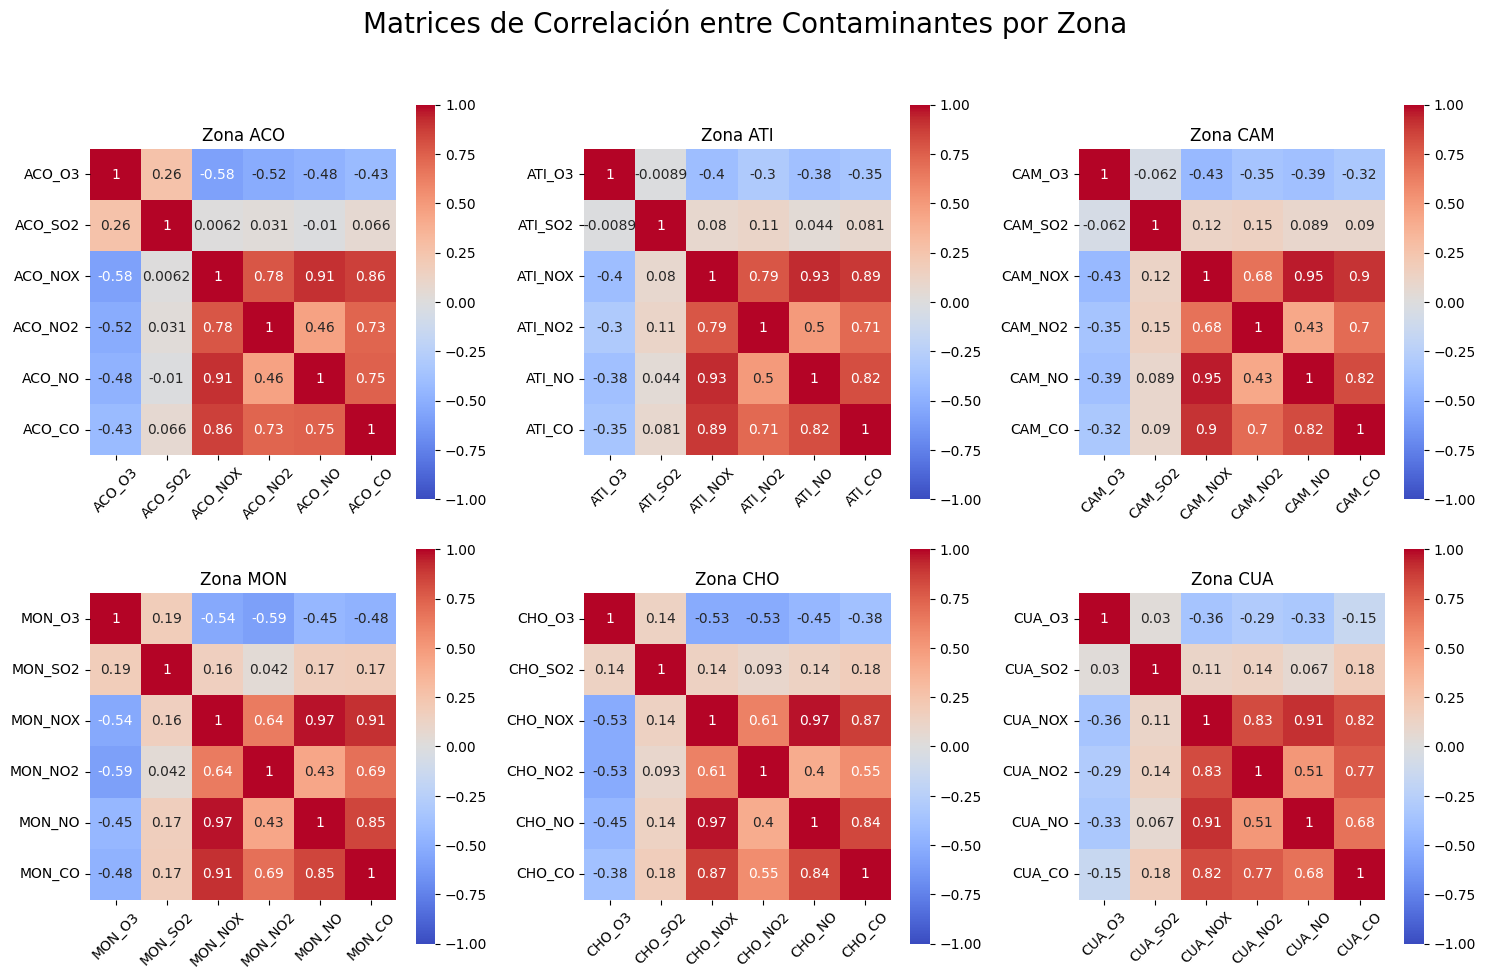

In [ ]:
# Pollutants to analyze
conts = ['O3', 'SO2', 'NOX', 'NO2', 'NO', 'CO']

# Specify the locations
locs = ['ACO', 'ATI', 'CAM', 'MON', 'CHO', 'CUA']

# Configure the figure
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Loop over the locations
for i, loc in enumerate(locs):
    row = i // 3
    col = i % 3

    # Select the data for the location
    data = df_final[[f'{loc}_{cont}' for cont in conts]].copy()

    # Calculate the correlation matrix
    corr = data.corr()

    # Plot the correlation matrix heatmap
    sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1,
                cbar=True, square=True, ax=axes[row, col])

    # Adjust the labels and title
    axes[row, col].set_title(f'Zona {loc}')
    axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), rotation=45)
    axes[row, col].set_yticklabels(axes[row, col].get_yticklabels(), rotation=0)

# Adjust the layout
plt.suptitle('Matrices de Correlación entre Contaminantes por Zona', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plot
plt.show()


# **3.What to do with missing data

In [ ]:
df_final.isnull().sum()

ACO_O3     1830
ACO_SO2    2379
ACO_NOX    1688
ACO_NO2    1688
ACO_NO     1688
ACO_CO     1687
ATI_O3     1238
ATI_SO2    1310
ATI_NOX    1279
ATI_NO2    1279
ATI_NO     1279
ATI_CO     1275
CAM_O3     2077
CAM_SO2    2187
CAM_NOX    2283
CAM_NO2    2283
CAM_NO     2283
CAM_CO     2466
MON_O3     1874
MON_SO2    1797
MON_NOX    1960
MON_NO2    1960
MON_NO     1960
MON_CO     1617
CHO_O3     1876
CHO_SO2    2672
CHO_NOX    2031
CHO_NO2    2031
CHO_NO     2031
CHO_CO     2013
CUA_O3      546
CUA_SO2     484
CUA_NOX     894
CUA_NO2     894
CUA_NO      894
CUA_CO      537
dtype: int64

In [ ]:
from scipy import interpolate
def interpolate_nearest(series):
    """Interpola los valores NaN utilizando el método nearest."""
    mask = series.notna()  #Boolean mask for non-NaN values
    indices = np.arange(len(series))  # Index of the series

    # Function to interpolate
    interpolator = interpolate.interp1d(indices[mask], series[mask], kind='nearest', fill_value='extrapolate')

    # Apply the interpolation
    interpolated_values = interpolator(indices)

    return interpolated_values

    # Loop over the columns
for col in df_final.columns:
    if df_final[col].dtype == 'float64':  # Verify if the column is numeric
        df_final[col] = interpolate_nearest(df_final[col])

In [ ]:
df_final.isnull().sum()

ACO_O3     0
ACO_SO2    0
ACO_NOX    0
ACO_NO2    0
ACO_NO     0
ACO_CO     0
ATI_O3     0
ATI_SO2    0
ATI_NOX    0
ATI_NO2    0
ATI_NO     0
ATI_CO     0
CAM_O3     0
CAM_SO2    0
CAM_NOX    0
CAM_NO2    0
CAM_NO     0
CAM_CO     0
MON_O3     0
MON_SO2    0
MON_NOX    0
MON_NO2    0
MON_NO     0
MON_CO     0
CHO_O3     0
CHO_SO2    0
CHO_NOX    0
CHO_NO2    0
CHO_NO     0
CHO_CO     0
CUA_O3     0
CUA_SO2    0
CUA_NOX    0
CUA_NO2    0
CUA_NO     0
CUA_CO     0
dtype: int64

In [ ]:

# Adjust the size of the figure
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# loop over the locations
for i, loc in enumerate(locs):
    row = i // 3
    col = i % 3

    # Select the data for the location
    data = df_final[[f'{loc}_{cont}' for cont in conts]].copy()

    # Calculate the correlation matrix
    corr = data.corr()

    # Draw the heatmap
    sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1,
                cbar=True, square=True, ax=axes[row, col])

    # Adjust the labels and title
    axes[row, col].set_title(f'Zona {loc}')
    axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), rotation=45)
    axes[row, col].set_yticklabels(axes[row, col].get_yticklabels(), rotation=0)

# Adjust the layout
plt.suptitle('Matrices de Correlación entre Contaminantes por Zona', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])

# show the plot
plt.show()

# **4. Modeling**

# Modeling

For the modeling phase, we first addressed the issue of missing data, as we observed that **NaN values significantly impacted our results**. To ensure clean data for the model, we created a **new DataFrame without missing values**, using **interpolation with the "nearest" method**. This step was essential since **Support Vector Machines (SVM) do not accept missing values**.

Next, we focused on the **O3 (Ozone) pollutant**, leveraging **SEDEMA** information to analyze the characteristics that define an environmental contingency.  
Initially, a **contingency is declared when ozone levels exceed 150 for more than six hours**, according to SEDEMA. However, since these events were relatively rare in our dataset, we adjusted the threshold to **100** to ensure a more balanced dataset.  
We then **aggregated the data by day** to count the number of contingencies.

To prepare the data for SVM classification, we needed a DataFrame containing both **NOX (Nitrogen Oxides) and Ozone levels**. We extracted data from the following monitoring zones:
- **ACO, ATI, CAM, MON, CHO, CUA, FAC, IZT, MER, NEZ, PED, SAG, SFE, TAH, TLA, UIZ, VIF, CCA**  
- Each column in this DataFrame represented the concentration of either **NOX or Ozone** at a specific location.

After structuring the data, we aggregated it by **day**, calculating the **maximum Ozone and NOX levels per day** using the **groupby() function with max()**.  
With this structured DataFrame, we iterated through each monitoring zone, extracting:
1. **X values:** The pollutant concentrations in that zone.
2. **y values:** The **"Contingency"** column, indicating whether a contingency was declared on that day.

To prepare the data for the SVM model, we:
- **Removed NaN values.**  
- **Standardized the data** using **StandardScaler**, which transformed the features to have a mean of 0 and a standard deviation of 1.

Once the data was **structured and scaled**, we:
1. **Generated a mesh grid** for visualization.
2. **Trained the SVM model** with an **RBF (Radial Basis Function) kernel** using the standardized data.
3. **Stored the trained models** in a list for later evaluation.
4. **Made predictions** using the trained SVM model.
5. **Visualized the decision boundaries** by creating **contour plots** for each monitoring zone.

Each subplot provides a **clear visual representation of how SVM classified Ozone and NOX concentrations** in different areas, helping us understand **how these pollutants relate to environmental contingencies.**


In [ ]:
# Time series data
Nhoras = 365 * 24
t = np.arange(0, Nhoras)

# Select locations and pollutants
locs = ['ACO', 'ATI', 'CAM', 'MON', 'CHO', 'CUA', 'FAC', 'IZT', 'LLA', 'LPR', 'MER', 'NEZ', 'PED', 'SAG', 'SFE', 'TAH', 'TLA', 'UIZ', 'VIF', 'CCA', 'MGH', 'MPA', 'BJU', 'INN', 'FAR', 'SAC']
conts = ['O3']

# Create a dictionary to store the data
data_dict = {'date': pd.date_range(start='2022-01-01', periods=Nhoras, freq='H')}

# Initialize the dictionary with NaN values
for loc in locs:
    for cont in conts:
        data_dict[f'{loc}_{cont}'] = [np.nan] * Nhoras

# Function to adjust the date
def adjust_hour(date_str):
    if '24:00' in date_str:
        date_str = date_str.replace(' 24:00', ' 00:00')
        date = pd.Timestamp(date_str) + pd.Timedelta(days=1)
    else:
        date = pd.Timestamp(date_str)
    return date

# File the dictionary with the data
for date, measurements in datos_2022['pollutionMeasurements']['date'].items():
    adjusted_date = adjust_hour(date)
    date_index = int((adjusted_date - pd.Timestamp('2022-01-01 00:00:00')).total_seconds() // 3600)
    for cont in conts:
        for loc in locs:
            if cont in measurements and loc in measurements[cont]:
                aux = measurements[cont][loc]
                if aux:
                    data_dict[f'{loc}_{cont}'][date_index] = float(aux)

# create a DataFrame
df = pd.DataFrame(data_dict)

# Filter until November 2022
end_date = '2022-11-30 23:59:59'
df_final = df[df['date'] <= end_date]
df_final=df_final[df_final['date'] > '2022-01-01 00:00:00']
df_final.reset_index(drop=True, inplace=True)
df_final.set_index('date', inplace=True)

df_final.head()

ACO_O3  ATI_O3  CAM_O3  MON_O3  CHO_O3  CUA_O3  FAC_O3  \
date                                                                          
2022-01-01 01:00:00     3.0     1.0     1.0    38.0    16.0    20.0     4.0   
2022-01-01 02:00:00     4.0     2.0     1.0    34.0    21.0    28.0     5.0   
2022-01-01 03:00:00     5.0     3.0     1.0    20.0    20.0    32.0     4.0   
2022-01-01 04:00:00     5.0     2.0     2.0    14.0    14.0    37.0     2.0   
2022-01-01 05:00:00     4.0    10.0     2.0    15.0    12.0    42.0     4.0   

                     IZT_O3  LLA_O3  LPR_O3  ...  TLA_O3  UIZ_O3  VIF_O3  \
date                                         ...                           
2022-01-01 01:00:00    12.0     2.0    10.0  ...     1.0     9.0     2.0   
2022-01-01 02:00:00     8.0     7.0     8.0  ...     1.0    12.0     3.0   
2022-01-01 03:00:00     6.0     5.0     3.0  ...     2.0     8.0     3.0   
2022-01-01 04:00:00     7.0     3.0     3.0  ...     2.0     3.0     3.0   
2022-01-01 05:00:00     4.0     3.0     1.0  ...     1.0     2.0     5.0   

                     CCA_O3  MGH_O3  MPA_O3  BJU_O3  INN_O3  FAR_O3  SAC_O3  
date                                                                         
2022-01-01 01:00:00    10.0     3.0    66.0    11.0    27.0    11.0    25.0  
2022-01-01 02:00:00     9.0     2.0    60.0     7.0    29.0     6.0    21.0  
2022-01-01 03:00:00     6.0     2.0    57.0     9.0    29.0     3.0     2.0  
2022-01-01 04:00:00     4.0     1.0    55.0     6.0    28.0     5.0     2.0  
2022-01-01 05:00:00     4.0     1.0    53.0     1.0    27.0     2.0     5.0  

[5 rows x 26 columns]

In [ ]:

# Convert the index to datetime
df_final.index = pd.to_datetime(df_final.index)

# Locations specified
ubicaciones = ['ACO', 'ATI', 'CAM', 'MON', 'CHO', 'CUA', 'FAC', 'IZT', 'LLA', 'LPR', 'MER', 'NEZ', 'PED', 'SAG', 'SFE', 'TAH', 'TLA', 'UIZ', 'VIF', 'CCA', 'MGH', 'MPA', 'BJU', 'INN', 'FAR', 'SAC']

# Create a column to store the contingency by hour
def contingencia_por_hora(row):
    for loc in ubicaciones:
        if row[f'{loc}_O3'] > 100:
            return 1
    return 0

# Apply the function to the DataFrame
df_final['Contingencia_Hora'] = df_final.apply(contingencia_por_hora, axis=1)

# Group by day and calculate the maximum O3 concentration
df_diario = df_final.groupby(pd.Grouper(freq='D')).agg({
    'Contingencia_Hora': 'sum',
    **{f'{loc}_O3': 'max' for loc in ubicaciones}
})

# Determine the contingency by day
df_diario['Contingencia'] = df_diario['Contingencia_Hora'].apply(lambda x: 1 if x >= 6 else 0)

# Eliminate the column 'Contingencia_Hora'
df_diario = df_diario.drop(columns=['Contingencia_Hora'])

In [ ]:
df_diario["Contingencia"].value_counts()

Contingencia
0    313
1     21
Name: count, dtype: int64

In [ ]:
# Time series data
Nhoras = 365 * 24
t = np.arange(0, Nhoras)

# Select locations and pollutants
locs = ['ACO', 'ATI', 'CAM', 'MON', 'CHO', 'CUA', 'FAC', 'IZT', 'MER', 'NEZ', 'PED', 'SAG', 'SFE', 'TAH', 'TLA', 'UIZ', 'VIF','CCA']
conts = ['O3','NOX']

# Create a dictionary to store the data
data_dict = {'date': pd.date_range(start='2022-01-01', periods=Nhoras, freq='H')}

# Initialize the dictionary with NaN values
for loc in locs:
    for cont in conts:
        data_dict[f'{loc}_{cont}'] = [np.nan] * Nhoras

# Function to adjust the date
def adjust_hour(date_str):
    if '24:00' in date_str:
        date_str = date_str.replace(' 24:00', ' 00:00')
        date = pd.Timestamp(date_str) + pd.Timedelta(days=1)
    else:
        date = pd.Timestamp(date_str)
    return date

# Refill the dictionary with the data
for date, measurements in datos_2022['pollutionMeasurements']['date'].items():
    adjusted_date = adjust_hour(date)
    date_index = int((adjusted_date - pd.Timestamp('2022-01-01 00:00:00')).total_seconds() // 3600)
    for cont in conts:
        for loc in locs:
            if cont in measurements and loc in measurements[cont]:
                aux = measurements[cont][loc]
                if aux:
                    data_dict[f'{loc}_{cont}'][date_index] = float(aux)

# Create a DataFrame
df = pd.DataFrame(data_dict)

# Filter until November 2022
end_date = '2022-11-30 23:59:59'
df_final_o3_Nox = df[df['date'] <= end_date]
df_final_o3_Nox=df_final_o3_Nox[df_final_o3_Nox['date'] > '2022-01-01 00:00:00']
df_final_o3_Nox.reset_index(drop=True, inplace=True)
df_final_o3_Nox.set_index('date', inplace=True)

df_final_o3_Nox.head()

ACO_O3  ACO_NOX  ATI_O3  ATI_NOX  CAM_O3  CAM_NOX  \
date                                                                     
2022-01-01 01:00:00     3.0     50.0     1.0     68.0     1.0    107.0   
2022-01-01 02:00:00     4.0     44.0     2.0     75.0     1.0    109.0   
2022-01-01 03:00:00     5.0     42.0     3.0     61.0     1.0     66.0   
2022-01-01 04:00:00     5.0     43.0     2.0     56.0     2.0     60.0   
2022-01-01 05:00:00     4.0     39.0    10.0     32.0     2.0     73.0   

                     MON_O3  MON_NOX  CHO_O3  CHO_NOX  ...  TAH_O3  TAH_NOX  \
date                                                   ...                    
2022-01-01 01:00:00    38.0     10.0    16.0     27.0  ...    12.0     35.0   
2022-01-01 02:00:00    34.0     12.0    21.0     20.0  ...     8.0     49.0   
2022-01-01 03:00:00    20.0     22.0    20.0     23.0  ...     8.0     39.0   
2022-01-01 04:00:00    14.0     56.0    14.0     39.0  ...    10.0     30.0   
2022-01-01 05:00:00    15.0     40.0    12.0     31.0  ...    13.0     23.0   

                     TLA_O3  TLA_NOX  UIZ_O3  UIZ_NOX  VIF_O3  VIF_NOX  \
date                                                                     
2022-01-01 01:00:00     1.0     80.0     9.0     45.0     2.0    114.0   
2022-01-01 02:00:00     1.0     79.0    12.0     40.0     3.0    110.0   
2022-01-01 03:00:00     2.0     57.0     8.0     43.0     3.0     90.0   
2022-01-01 04:00:00     2.0     53.0     3.0     55.0     3.0     89.0   
2022-01-01 05:00:00     1.0     49.0     2.0     61.0     5.0    126.0   

                     CCA_O3  CCA_NOX  
date                                  
2022-01-01 01:00:00    10.0     36.0  
2022-01-01 02:00:00     9.0     36.0  
2022-01-01 03:00:00     6.0     36.0  
2022-01-01 04:00:00     4.0     41.0  
2022-01-01 05:00:00     4.0     41.0  

[5 rows x 36 columns]

In [ ]:
# GRoup by day and calculate the average concentration
df_daily_o3_Nox = df_final_o3_Nox.groupby(pd.Grouper(freq='D')).mean()

# show the first rows
print(df_daily_o3_Nox.head())

               ACO_O3    ACO_NOX     ATI_O3    ATI_NOX     CAM_O3    CAM_NOX  \
date                                                                           
2022-01-01  25.956522  29.478261  23.782609  31.391304  19.652174  52.000000   
2022-01-02  18.250000  21.500000  17.333333  21.000000  12.416667  35.166667   
2022-01-03  24.619048  27.904762  12.000000  16.000000  17.000000  15.000000   
2022-01-04  20.625000  47.125000        NaN        NaN        NaN        NaN   
2022-01-05  30.416667  39.500000        NaN        NaN        NaN        NaN   

               MON_O3    MON_NOX     CHO_O3    CHO_NOX  ...     TAH_O3  \
date                                                    ...              
2022-01-01  36.608696  28.347826  34.217391  37.521739  ...  38.500000   
2022-01-02  19.375000  37.750000  20.869565  46.652174  ...  21.875000   
2022-01-03  30.238095  30.476190  36.238095  35.095238  ...  37.400000   
2022-01-04  33.041667  70.875000  32.875000  76.000000  ...  35.00000

In [ ]:
def interpolate_nearest(series):
    """Interpola los valores NaN utilizando el método nearest."""
    mask = series.notna()  # Bool mask for non-NaN values
    indices = np.arange(len(series))  # Index of the series

    # Interpolation function
    interpolator = interpolate.interp1d(indices[mask], series[mask], kind='nearest', fill_value='extrapolate')

    # Apply the interpolation
    interpolated_values = interpolator(indices)

    return interpolated_values

    # Iterate over the columns
for col in df_diario.columns:
    if  df_diario[col].dtype == 'float64':  # Verify if the column is numeric
         df_diario[col] = interpolate_nearest( df_diario[col])

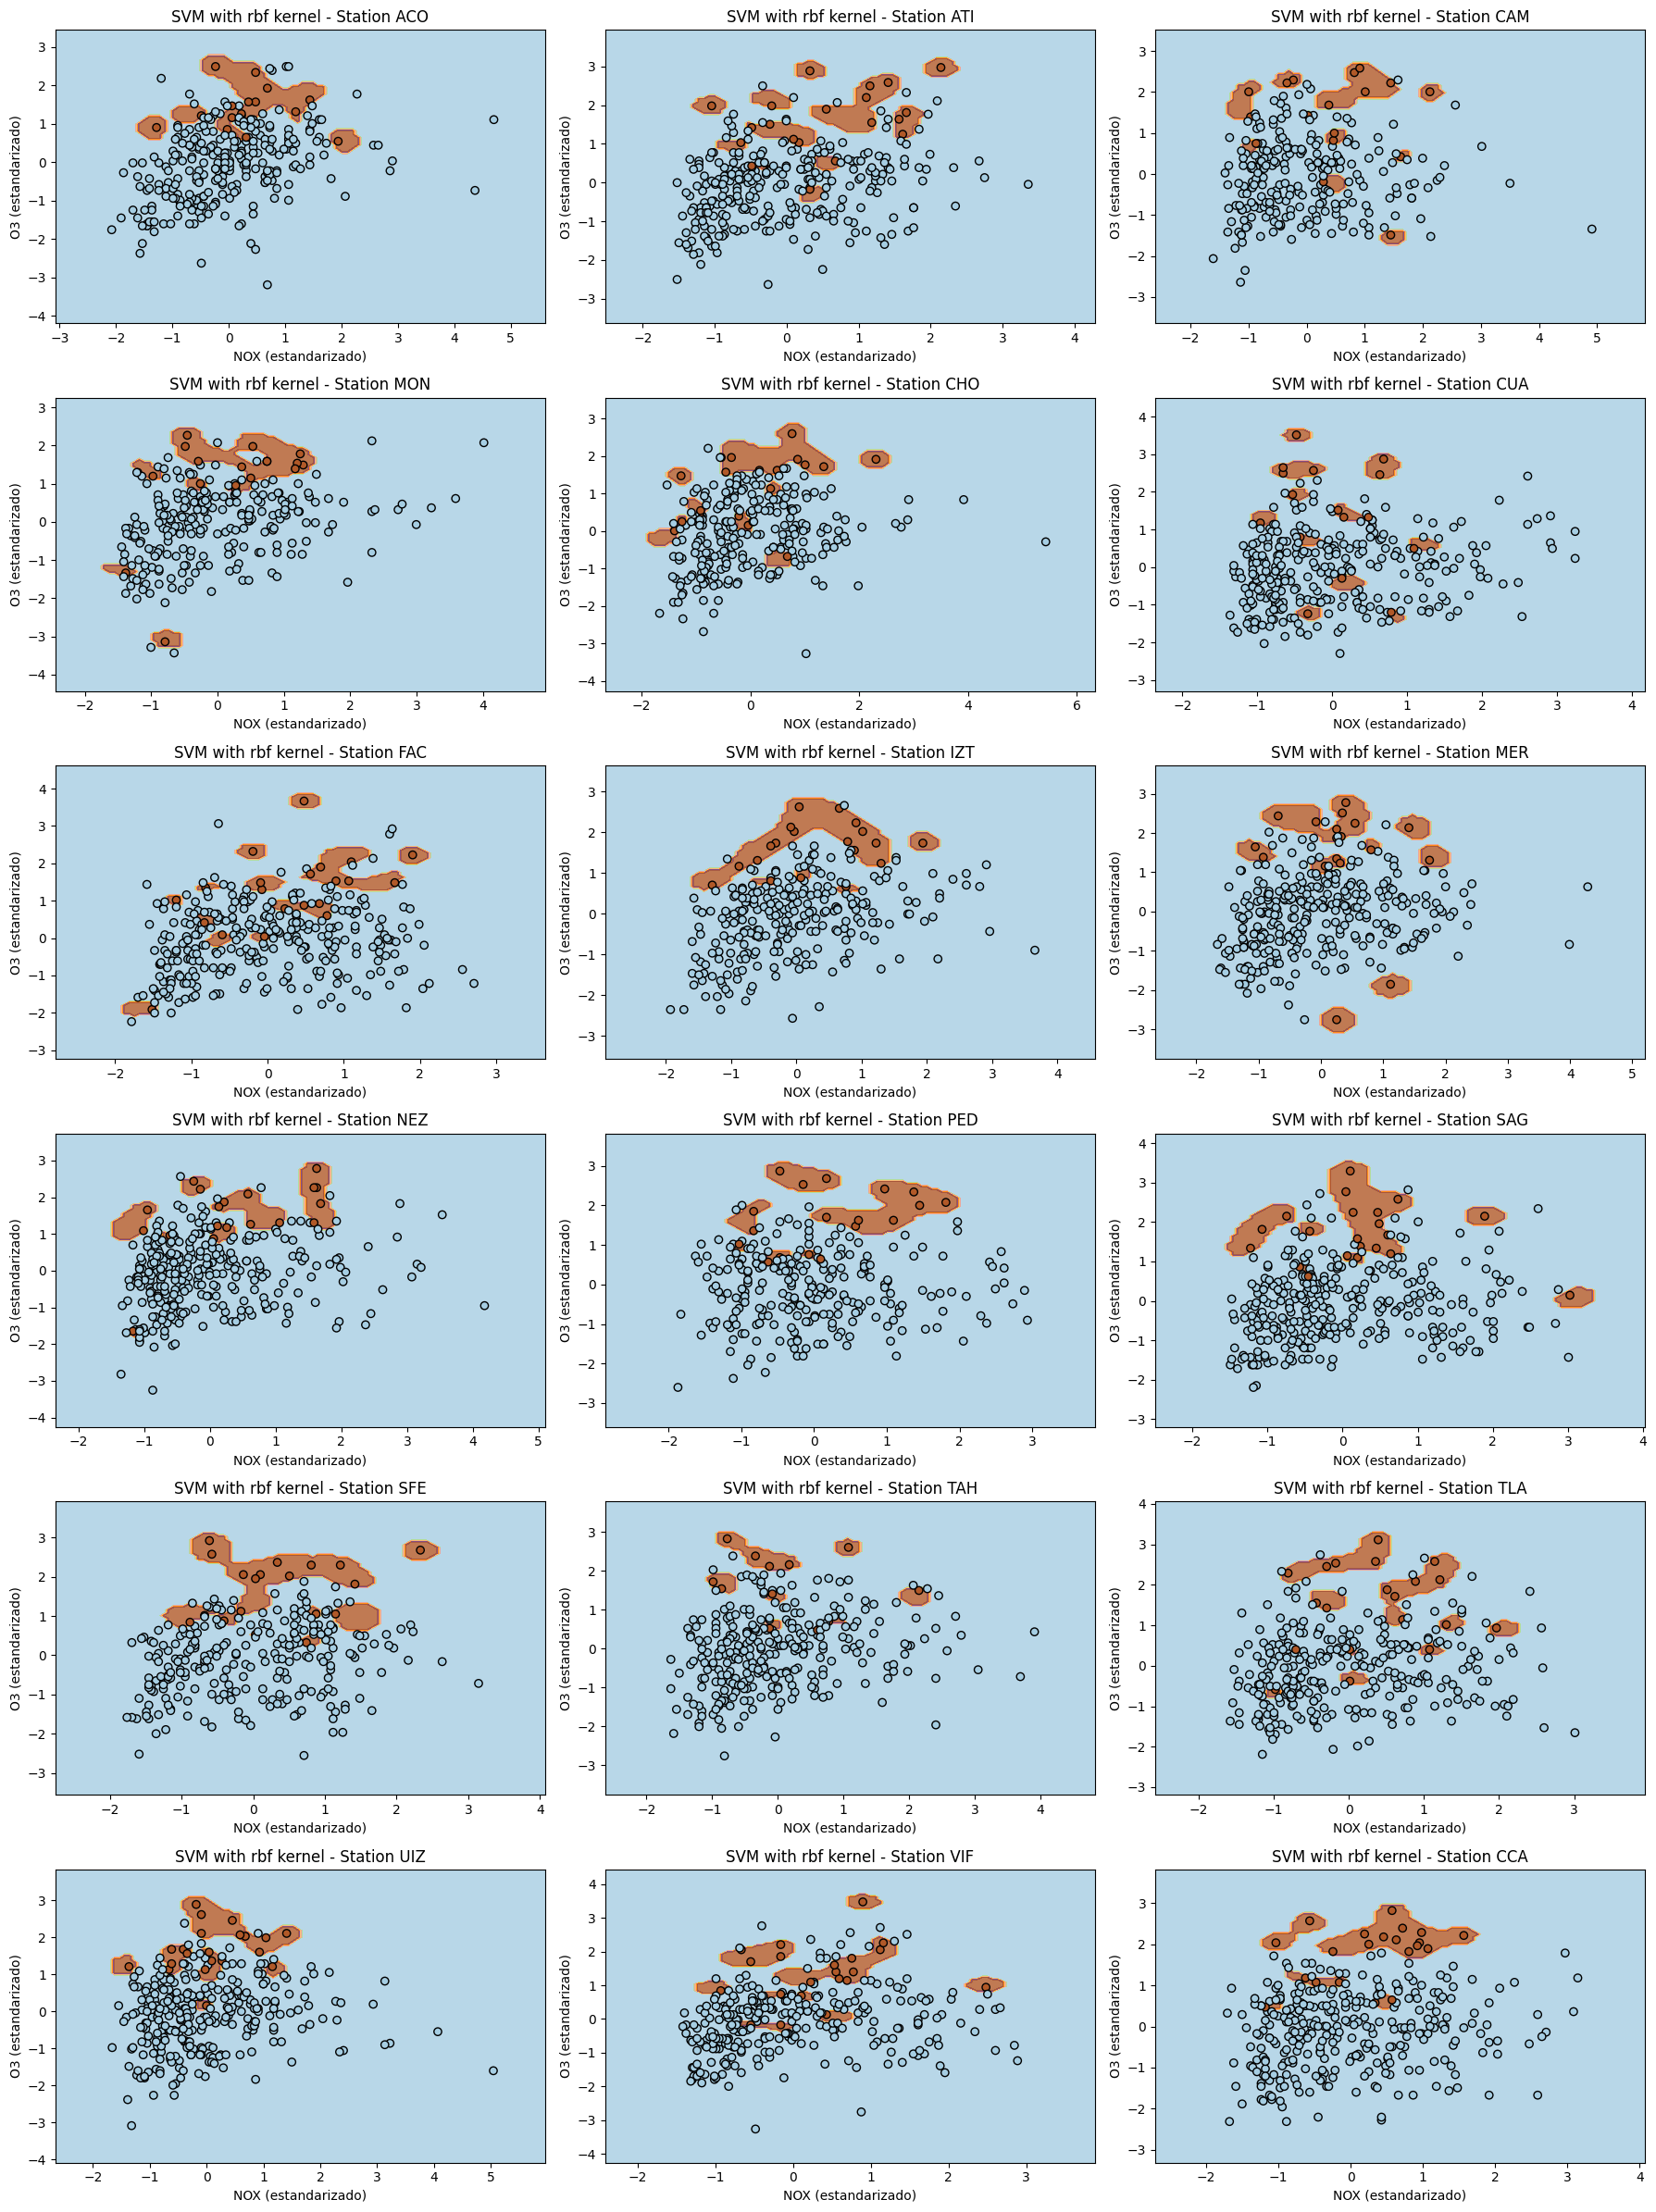

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn import svm

# Define the locations
locs = ['ACO', 'ATI', 'CAM', 'MON', 'CHO', 'CUA', 'FAC', 'IZT', 'MER', 'NEZ', 'PED', 'SAG', 'SFE', 'TAH', 'TLA', 'UIZ', 'VIF', 'CCA']

# Prepare the data
svc_models = []
Z_rbf_all = []

# Configure the subplot layout
num_plots = len(locs)
num_cols = 3
num_rows = (num_plots // num_cols) + (num_plots % num_cols > 0)  # Calcular el número de filas necesario

# configure the figure size
fig_width = 18  
fig_height = num_rows * 4  

plt.figure(figsize=(fig_width, fig_height))

# Iterate over the locations
for i, loc in enumerate(locs):
    # Select the data for the location
    X = df_daily_o3_Nox[[f"{loc}_NOX", f"{loc}_O3"]].values
    y = df_diario['Contingencia'].values

    # Eliminar las filas con valores NaN
    mask = ~np.isnan(X).any(axis=1)
    X = X[mask]
    y = y[mask]

    # Standarize the data
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Create a meshgrid to plot the decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = (x_max - x_min) / 100
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Adjust svm
    svc_rbf = svm.SVC(kernel='rbf', C=200, gamma=8).fit(X, y)
    svc_models.append(svc_rbf)  # Save the model for this station

    # Predict the decision
    Z_rbf = svc_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z_rbf = Z_rbf.reshape(xx.shape)
    Z_rbf_all.append(Z_rbf)  # Save the decision for this station

    # Visualize the decision
    plt.subplot(num_rows, num_cols, i + 1)
    plt.contourf(xx, yy, Z_rbf, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel('NOX (estandarizado)')
    plt.ylabel('O3 (estandarizado)')
    plt.title(f'SVM with rbf kernel - Station {loc}')

# Adjust the layout
plt.tight_layout()
plt.show()

#**5. Descriptive Analysis**

# Descriptive Analysis

For this section, we used the **final dataset** created in the previous steps, which includes **hourly ozone concentration data** for each monitoring zone. 

### **1. Scatter Plots of Ozone Concentration by Hour**
- We first applied **interpolation** to smooth out missing values.
- Then, we generated **scatter plots** to visualize the hourly ozone concentration trends in each zone.
- These plots provided insights into **when ozone levels peak throughout the day** in different areas.

### **2. Correlation Matrix for Ozone Levels**
- We plotted a **correlation matrix** for ozone concentration across different monitoring stations.
- This allowed us to **identify patterns and relationships** between ozone levels in various regions of the city.

### **3. Maximum Daily Ozone Levels**
- Using the previously **grouped dataset**, we identified the **maximum ozone level recorded per day** in each zone.
- We plotted these values in a **scatter plot**, allowing us to observe variations in peak ozone concentration over time.

### **4. Relationship Between NOX and Ozone**
- We extended our analysis by incorporating **NOX (Nitrogen Oxides) data**.
- A scatter plot was generated to **visualize the relationship between NOX and Ozone** across all monitoring stations.
- This helped determine how NOX levels correlate with ozone concentration.

### **5. Comparative Analysis of Pollutant Distribution**
- Using previous visualizations, we created **a comparative scatter plot** to analyze how Ozone and NOX concentrations vary across different areas and time periods.
- The analysis revealed that:
  - **Ozone (O3) is consistently present across all monitoring zones** and is the dominant pollutant.
  - **NOX concentrations vary significantly** across regions.
  - **CHO (Chalco) has the lowest NOX levels**, whereas **CCA (Centro de Control Atmosférico) shows a significant increase** in NOX.
  - Unlike NOX, **ozone levels remain relatively stable and widespread** across all monitoring locations.

These visualizations provided a **clear understanding of pollutant behavior over time**, highlighting the **spatial and temporal variations** of Ozone and NOX concentrations in Mexico City.


In [ ]:
def interpolate_nearest(series):
    """Interpola los valores NaN utilizando el método nearest."""
    mask = series.notna()  # Boolean mask for non-NaN values
    indices = np.arange(len(series))  # Indices of the series

    # Function to interpolate
    interpolator = interpolate.interp1d(indices[mask], series[mask], kind='nearest', fill_value='extrapolate')

    # Apply the interpolation
    interpolated_values = interpolator(indices)

    return interpolated_values

    # Iterate over the columns
for col in df_final.columns:
    if  df_final[col].dtype == 'float64':  # Verify if the column is numeric
         df_final[col] = interpolate_nearest( df_final[col])

In [ ]:
# Number of columns
num_columns = df_final.shape[1]

# Calculate the number of rows
num_rows = (num_columns + 4) // 5  

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=5, figsize=(20, num_rows * 3))

# Flatten the axes
axes = axes.flatten()

# Iterate over the columns
for i, col in enumerate(df_final.columns):
    ax = axes[i]
    ax.scatter(df_final.index, df_final[col])
    ax.set_title(col)
    ax.set_xlabel('Índice')
    ax.set_ylabel(col)

# Hide the axes without data
for j in range(num_columns, num_rows * 5):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

Correlation matrix

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df_final.corr()

# Create a heatmap  
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()

In [ ]:
df_diario = df_diario.drop(columns='Contingencia')

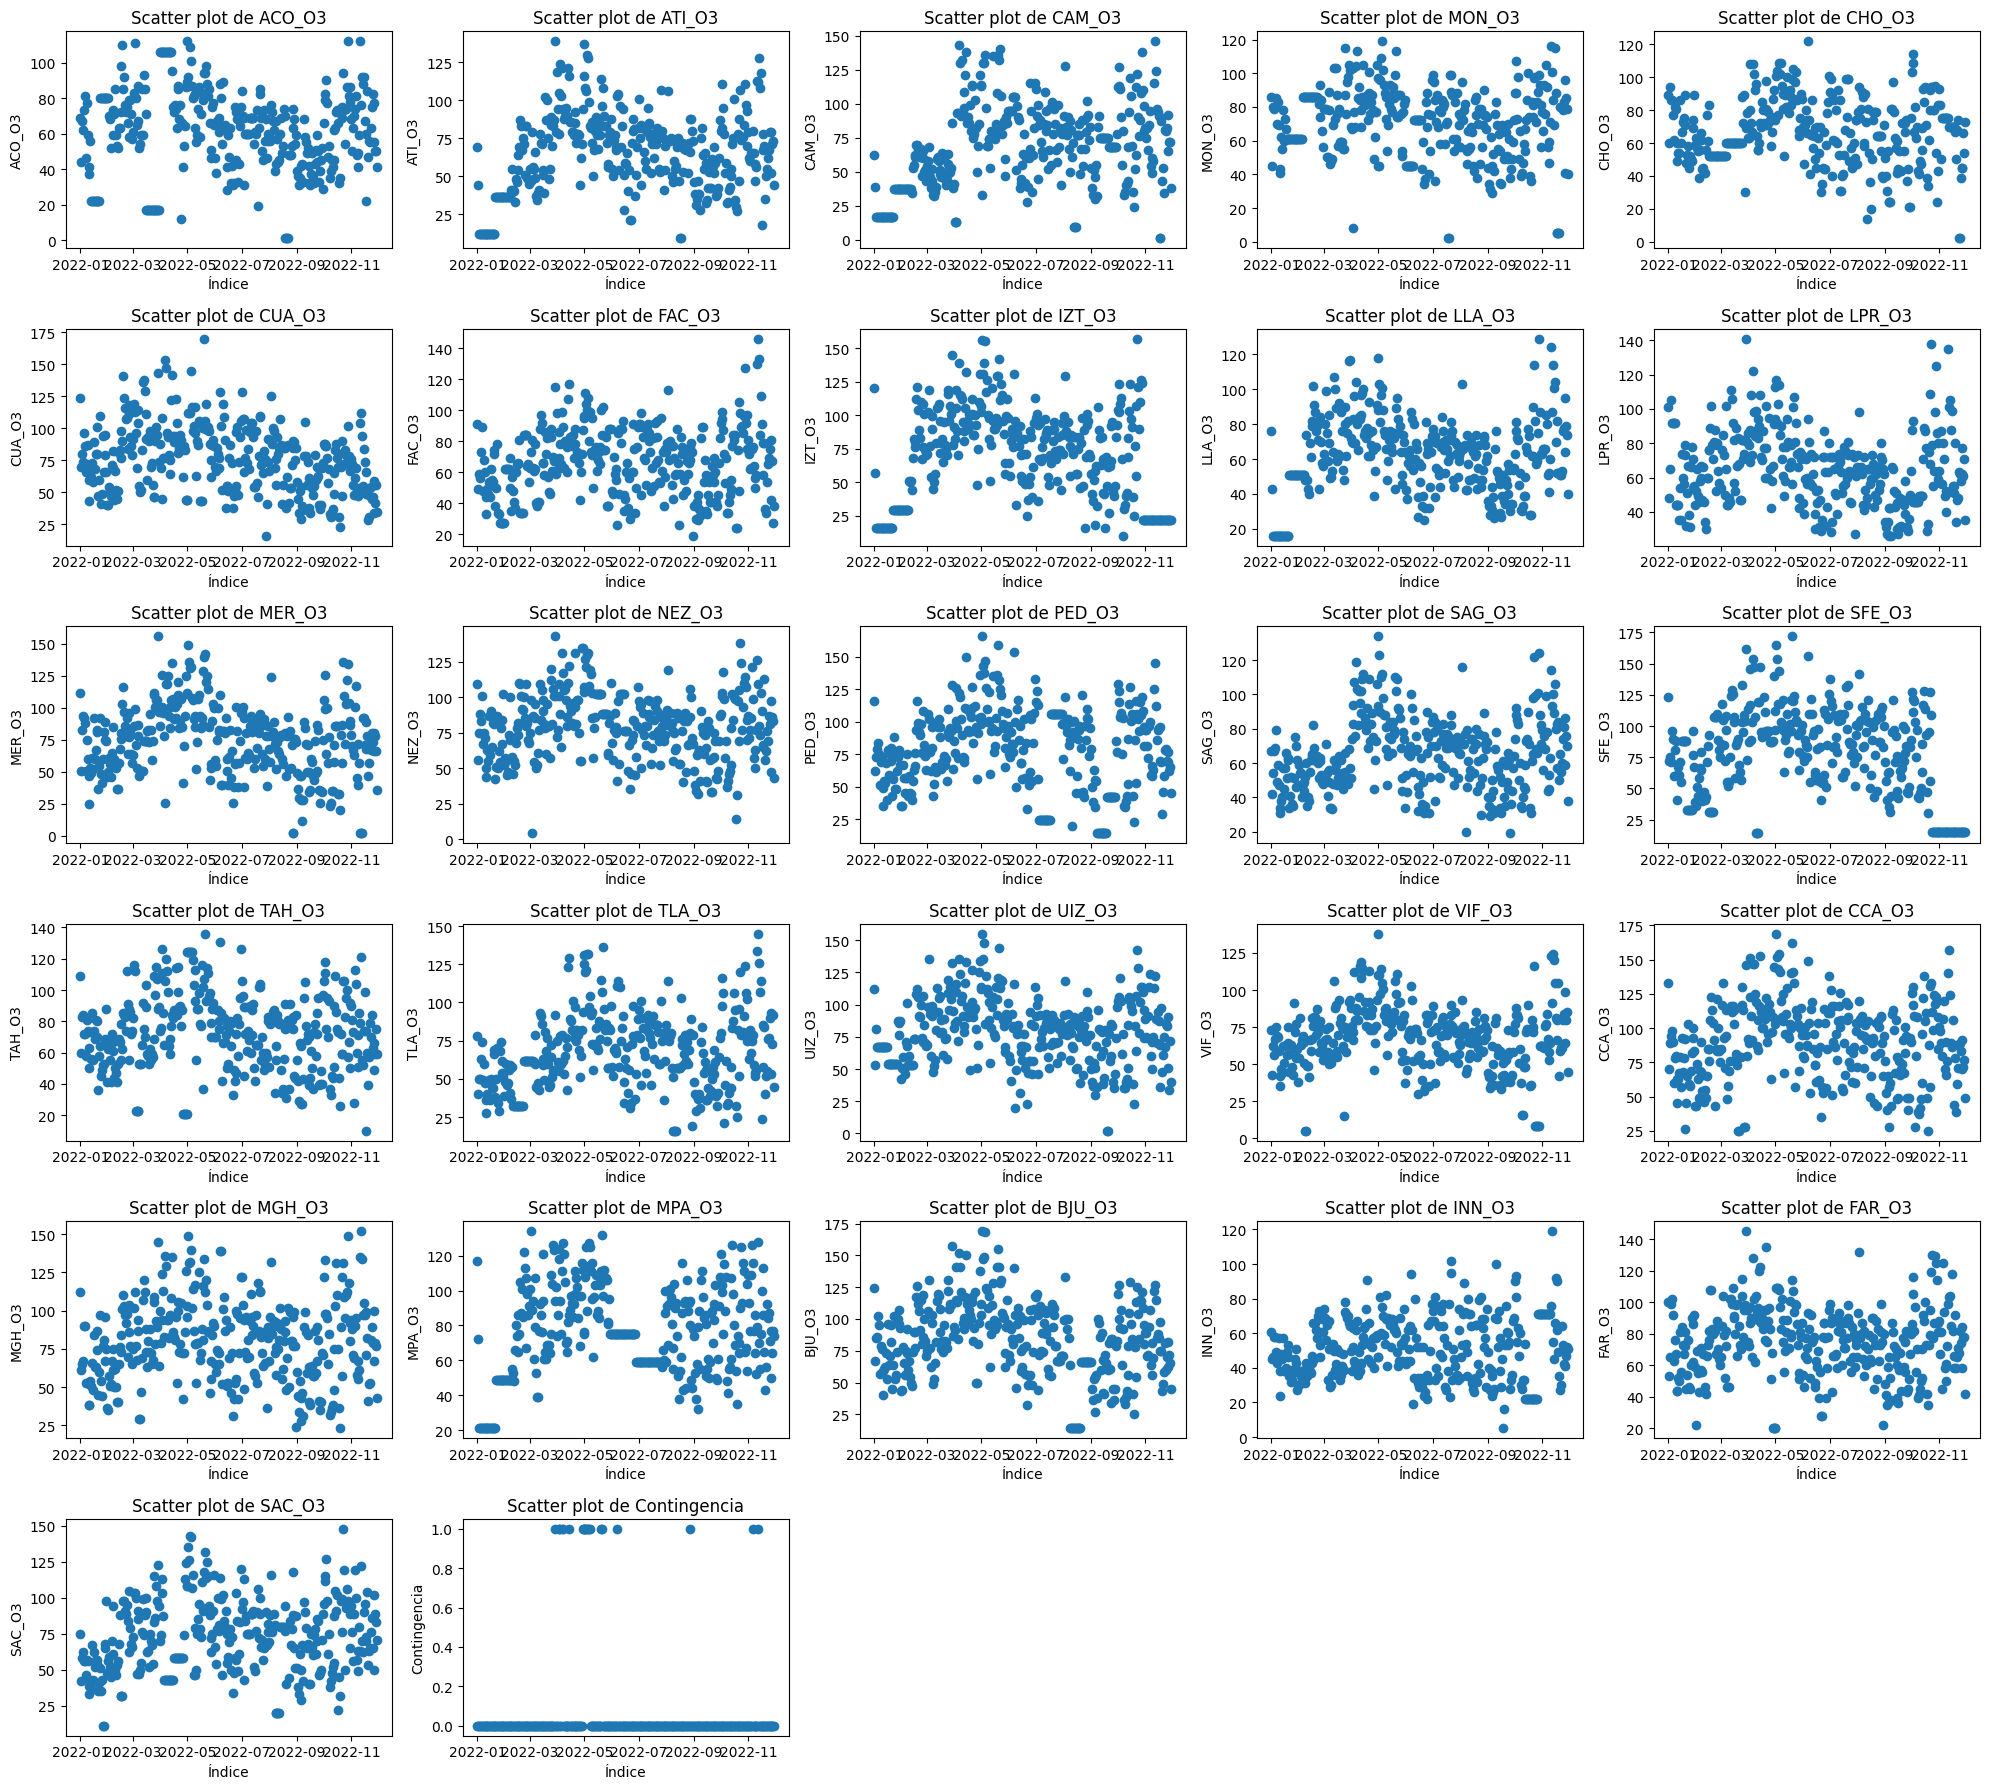

In [ ]:
# Eliminate the first column if it is the date
if df_diario.columns[0] == 'date':
    df_diario_o3 = df_diario.iloc[:, 1:]

# Number of columns
num_columns = df_diario.shape[1]

# Calculate the number of rows
num_rows = (num_columns + 4) // 5  

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=5, figsize=(20, num_rows * 3))

# Flatten the axes
axes = axes.flatten()

#   Iterate over the columns
for i, col in enumerate(df_diario.columns):
    ax = axes[i]
    ax.scatter(df_diario.index, df_diario[col])
    ax.set_title(f'Scatter plot de {col}')
    ax.set_xlabel('Índice')
    ax.set_ylabel(col)

# Hide the axes without data
for j in range(num_columns, num_rows * 5):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
num_columns = df_final_o3_Nox.shape[1]

# Create a list of column pairs
column_pairs = [(i, i+1) for i in range(0, num_columns, 2)]

# Calculate the number of rows
num_rows = (len(column_pairs) + 4) // 5 

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=5, figsize=(20, num_rows * 4))

# Flatten the axes
axes = axes.flatten()

# Iterate over the column pairs
for i, (x_col, y_col) in enumerate(column_pairs):
    ax = axes[i]
    ax.scatter(df_final_o3_Nox.iloc[:, x_col], df_final_o3_Nox.iloc[:, y_col])
    ax.set_title(f'Columna {x_col+1} vs Columna {y_col+1}')
    ax.set_xlabel(df_final_o3_Nox.columns[x_col])
    ax.set_ylabel(df_final_o3_Nox.columns[y_col])

# Hide the axes without data
for j in range(len(column_pairs), num_rows * 5):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

Desfase de horas plots.

In [ ]:
# Number of columns
num_columns = df_final_o3_Nox.shape[1]

# Create a list of column pairs
column_pairs = [(i, i+1) for i in range(0, num_columns, 2)]

# Calculate the number of rows
num_rows = (len(column_pairs) + 4) // 5 

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=5, figsize=(20, num_rows * 4))

# Flatten the axes
axes = axes.flatten()

# Iterate over the column pairs
for i, (x_col, y_col) in enumerate(column_pairs):
    ax = axes[i]

    # Select the data with a 5-hour lag
    x_data = df_final_o3_Nox.iloc[:-5, x_col]  # Exclude the last 5 records to avoid NaN
    y_data = df_final_o3_Nox.iloc[5:, y_col]   # Exclude the first 5 records to avoid NaN

    ax.scatter(x_data, y_data)
    ax.set_title(f'{df_final_o3_Nox.columns[x_col]} vs {df_final_o3_Nox.columns[y_col]} (desfase de 5 horas)')
    ax.set_xlabel(df_final_o3_Nox.columns[x_col])
    ax.set_ylabel(df_final_o3_Nox.columns[y_col])

# Hide the axes without data
for j in range(len(column_pairs), num_rows * 5):
    axes[j].axis('off')

plt.tight_layout()
plt.show()